### 正则化

(300, 2)
(300, 1)
[['red'], ['blue'], ['red'], ['red'], ['red'], ['blue'], ['red'], ['red'], ['blue'], ['red'], ['red'], ['blue'], ['red'], ['red'], ['red'], ['red'], ['red'], ['blue'], ['red'], ['red'], ['red'], ['blue'], ['red'], ['blue'], ['blue'], ['red'], ['red'], ['red'], ['blue'], ['red'], ['blue'], ['red'], ['blue'], ['red'], ['blue'], ['blue'], ['red'], ['blue'], ['red'], ['blue'], ['blue'], ['red'], ['red'], ['red'], ['red'], ['red'], ['red'], ['red'], ['blue'], ['red'], ['red'], ['red'], ['red'], ['blue'], ['red'], ['red'], ['red'], ['red'], ['blue'], ['red'], ['red'], ['blue'], ['blue'], ['red'], ['red'], ['blue'], ['blue'], ['red'], ['blue'], ['red'], ['blue'], ['red'], ['red'], ['red'], ['blue'], ['blue'], ['blue'], ['blue'], ['red'], ['blue'], ['red'], ['red'], ['red'], ['blue'], ['red'], ['red'], ['red'], ['red'], ['blue'], ['red'], ['blue'], ['red'], ['blue'], ['red'], ['red'], ['blue'], ['blue'], ['red'], ['red'], ['red'], ['red'], ['red'], ['red'], ['blue'], ['red'],

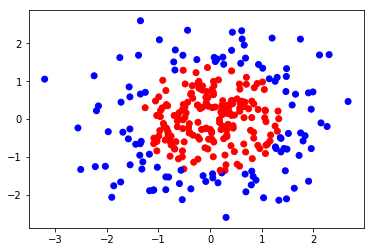

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
batch_size = 30
X = np.random.RandomState(2019).randn(300,2)
Y_ = [int(x0*x0+x1*x1 < 2) for (x0,x1) in X]
Y_c = [['red' if y else 'blue'] for y in Y_] # 定义颜色
X = np.vstack(X).reshape(-1,2)
Y_ = np.vstack(Y_).reshape(-1,1)

print(X.shape)
print(Y_.shape)
print(Y_c)

%matplotlib inline
plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
plt.show()

#### 不含正则化

After 0 training step(s), loss on all data is 0.594559:
After 2000 training step(s), loss on all data is 0.0467379:
After 4000 training step(s), loss on all data is 0.0386355:
After 6000 training step(s), loss on all data is 0.0354795:
After 8000 training step(s), loss on all data is 0.0334462:
After 10000 training step(s), loss on all data is 0.032882:
After 12000 training step(s), loss on all data is 0.0324921:
After 14000 training step(s), loss on all data is 0.0322483:
After 16000 training step(s), loss on all data is 0.0319419:
After 18000 training step(s), loss on all data is 0.031531:
After 20000 training step(s), loss on all data is 0.0311947:
After 22000 training step(s), loss on all data is 0.030578:
After 24000 training step(s), loss on all data is 0.0304235:
After 26000 training step(s), loss on all data is 0.030336:
After 28000 training step(s), loss on all data is 0.0302655:
After 30000 training step(s), loss on all data is 0.0302042:
After 32000 training step(s), loss on

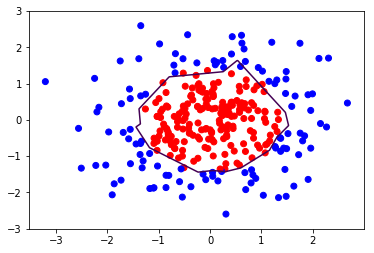

In [7]:
def get_weight(shape, regularizer):
    w = tf.Variable(tf.random_normal(shape), tf.float32)
    tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w

def get_bias(shape):
    return tf.Variable(tf.constant(0.01, shape=shape))

x = tf.placeholder(tf.float32, shape=[None,2])
y_ = tf.placeholder(tf.float32, shape=[None,1])

w1 = get_weight([2,11], 0.01)
b1 = get_bias([11])
y1 = tf.nn.relu(tf.matmul(x,w1)+b1)

w2 = get_weight([11,1], 0.01)
b2 = get_bias([1])
y = tf.nn.relu(tf.matmul(y1,w2)+b2) #输出层不过激活函数

#定义损失函数
loss_mse = tf.reduce_mean(tf.square(y_-y)) #没有正则化损失
loss_total = loss_mse + tf.add_n(tf.get_collection('losses')) #有正则化损失

#定义反向传播，不含正则化
train_step = tf.train.AdamOptimizer(0.001).minimize(loss_mse)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(40001):
        start = (i*batch_size) % 300
        end = start + batch_size  #batch_size=30
        sess.run(train_step, feed_dict={x:X[start:end], y_:Y_[start:end]})
        if i % 2000 == 0:
            loss_mse_val = sess.run(loss_mse, feed_dict={x:X, y_:Y_})
            print('After %d training step(s), loss on all data is %g:' %(i, loss_mse_val))
    
    #xx在-3，3之间，步长0.01，yy也是
    xx,yy = np.mgrid[-3:3:.01, -3:3:.01]
    #将xx，yy拉直，合并成一个2列的矩阵，得到一个网格坐标点的集合
    grid = np.c_[xx.ravel(), yy.ravel()]
    #将网格坐标点喂入神经网络，probs为输出
    probs = sess.run(y,feed_dict={x:grid})
    #probs的shape调整成xx的样子
    probs = probs.reshape(xx.shape)
    print('w1:',sess.run(w1),',w1 shape',sess.run(w1).shape,'\n')
    print('w2:',sess.run(w2),',w2 shape',sess.run(w2).shape,'\n')
    print('b1:',sess.run(b1),',b1 shape',sess.run(b1).shape,'\n')

plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
plt.contour(xx,yy,probs,levels=[.5])
plt.show()

#### 包含正则化

After 0 training step(s), loss on all data is 0.553614:
After 2000 training step(s), loss on all data is 0.0635113:
After 4000 training step(s), loss on all data is 0.058292:
After 6000 training step(s), loss on all data is 0.0575091:
After 8000 training step(s), loss on all data is 0.0569904:
After 10000 training step(s), loss on all data is 0.0570419:
After 12000 training step(s), loss on all data is 0.0571238:
After 14000 training step(s), loss on all data is 0.0571991:
After 16000 training step(s), loss on all data is 0.0572672:
After 18000 training step(s), loss on all data is 0.0573237:
After 20000 training step(s), loss on all data is 0.0573788:
After 22000 training step(s), loss on all data is 0.0574262:
After 24000 training step(s), loss on all data is 0.0574668:
After 26000 training step(s), loss on all data is 0.0574999:
After 28000 training step(s), loss on all data is 0.0575268:
After 30000 training step(s), loss on all data is 0.0575478:
After 32000 training step(s), loss

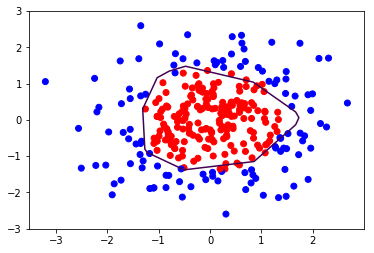

In [8]:
#定义反向传播，包含正则化
train_step = tf.train.AdamOptimizer(0.001).minimize(loss_total)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(40001):
        start = (i*batch_size) % 300
        end = start + batch_size  #batch_size=30
        sess.run(train_step, feed_dict={x:X[start:end], y_:Y_[start:end]})
        if i % 2000 == 0:
            loss_mse_val = sess.run(loss_mse, feed_dict={x:X, y_:Y_})
            print('After %d training step(s), loss on all data is %g:' %(i, loss_mse_val))
    
    #xx在-3，3之间，步长0.01，yy也是
    xx,yy = np.mgrid[-3:3:.01, -3:3:.01]
    #将xx，yy拉直，合并成一个2列的矩阵，得到一个网格坐标点的集合
    grid = np.c_[xx.ravel(), yy.ravel()]
    #将网格坐标点喂入神经网络，probs为输出
    probs = sess.run(y,feed_dict={x:grid})
    #probs的shape调整成xx的样子
    probs = probs.reshape(xx.shape)
    print('w1:',sess.run(w1),',w1 shape',sess.run(w1).shape,'\n')
    print('w2:',sess.run(w2),',w2 shape',sess.run(w2).shape,'\n')
    print('b1:',sess.run(b1),',b1 shape',sess.run(b1).shape,'\n')

plt.scatter(X[:,0],X[:,1],c=np.squeeze(Y_c))
plt.contour(xx,yy,probs,levels=[.5])
plt.show()